# VELMA-ARC Rehabilitation Bootcamp 2.0

<a href="'https://classroom.google.com/c/NTA1NjA0MTMwNzQ1?cjc=4u6on64'">Join the google classroom using this link</a>
* Assigments will be shared in the class room and should be submitted. 
*Question and answers can be posted in the online class

### Machine Learning Assignment Week 3

In this assignment you will analyze wine-quality dataset and you will train a machine learning model to classify a wine quality
* Logistic Regression
* Decision Tree
* Random Forest

import data analysis libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import machine learning libraries

In [4]:
#import LogisticRegression 
from sklearn.linear_model import LogisticRegression

#import DecsionTreeClassifier from the sklearn.tree
from sklearn.tree import DecisionTreeClassifier

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

Import Metrics

In [5]:
#import classification_report
from sklearn.metrics import classification_report

#import confusion_matrix
from sklearn.metrics import confusion_matrix

#import accuracy_score
from sklearn.metrics import accuracy_score

Read in the ''wine-quality.csv" data using the read_csv() method of pandas

In [13]:
data = pd.read_csv('wine-quality.csv')

Check the first five rows (head) of the data

In [15]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low


check the info of the data

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null object
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


Check the shape of the data

In [17]:
data.shape

(1599, 12)

Display summary statistics of the data

In [18]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


check for missing values

In [19]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### Now answer the following question
* Are there missing values in the data?
* How many columns are the data?
* How many rows are in the data?
* What is the mean density of the wine?

#### Exploratory Data Analysis

Check the value counts of the quality column

In [20]:
data['quality'].value_counts()

High    855
Low     744
Name: quality, dtype: int64

make a countplot of the quality column using seaborn .countplot()

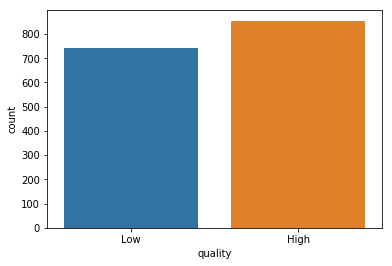

In [21]:
sns.countplot(data['quality'])

##### Answer the following
* Are there more high quality wines?

What is the distribution of the chlorides

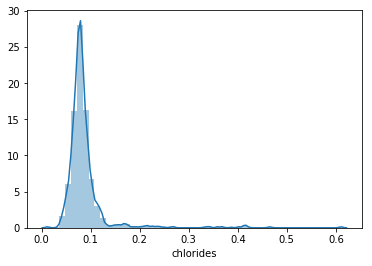

In [22]:
sns.distplot(data['chlorides'])

### Data Preparation

We can see that our target column is holding object dtype values. 
* write a function that converts values in the quality column to int
> The function should convert High to >> 1 and Low to >> 0 \
> Apply the function to the quality column. Remember to assign it back to the quality collumn to save your result

In [23]:
# define a function
def convert(qty):
    if qty == 'High':
        return 1
    else:
        return 0
          


In [24]:
convert('High')

1

In [25]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
# apply the function to the 'quality' column
data['quality']=data['quality'].apply(convert)

Seperate the the target column 'quality' and the features from the data and save to y and X respectively

In [27]:
# Grab the target
y = data['quality']

# Grab the features
X = data.drop('quality', axis=1)

In [29]:
from sklearn.model_selection import train_test_split

split the data into training set and validation set using train_test_split function

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

Check the shape of all the data

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

#### Training Logistic Regression

* Intantiate a LogisticRegression model with random_state=45

In [34]:
log_model = LogisticRegression(random_state=45)

fit the model on X_train and y_train

In [35]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=45, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

predict on X_test using

In [37]:
log_preds = log_model.predict(X_test)

Evaluate the model using classification report and confusion_matrix

In [40]:
print (classification_report(y_test, log_preds))

             precision    recall  f1-score   support

          0       0.76      0.75      0.75       224
          1       0.78      0.79      0.78       256

avg / total       0.77      0.77      0.77       480



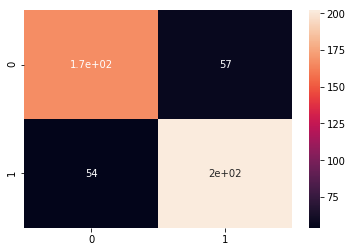

In [45]:
sns.heatmap(confusion_matrix(y_test, log_preds),annot=True)

#### Training DecisionTree Model

* Instantiate DecisionTreeClassifier with random_state=45

In [46]:
tree_model = DecisionTreeClassifier(random_state=20)

fit the model on X_train, y_train

In [47]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

Predict on X_test

In [49]:
tree_preds = tree_model.predict(X_test)

Evaluate the model:
* print the confusion_matrix
* print the classification_report

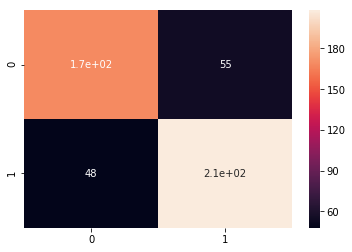

In [55]:
# print confusion_matrix
sns.heatmap(confusion_matrix(y_test, tree_preds), annot=True)

# print classification_report


In [56]:
print (classification_report(y_test, tree_preds))

             precision    recall  f1-score   support

          0       0.78      0.75      0.77       224
          1       0.79      0.81      0.80       256

avg / total       0.79      0.79      0.79       480



#### Training Random Forest Classifier

* Instantiate RandomForestClassifier with random_state=45

In [57]:
rfc = RandomForestClassifier(random_state=20)

Fit the model on X_train and y_train

In [60]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

Predict on X_test

In [61]:
rfc_preds = rfc.predict(X_test)

Evaluate the model:
* print the confusion_matrix
* print the classification_report

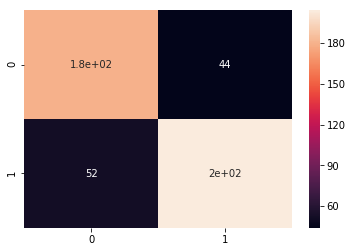

In [64]:
sns.heatmap(confusion_matrix(y_test, rfc_preds), annot=True)

In [65]:
print (classification_report(y_test, rfc_preds))

             precision    recall  f1-score   support

          0       0.78      0.80      0.79       224
          1       0.82      0.80      0.81       256

avg / total       0.80      0.80      0.80       480



###### Answer the folowing question
* which model has high performance
* which model has lowest performance

#### Now lets compare the model with bar chart

* create a list `classifier = ['Logistic Regression','Decision Tree','Random Forest']` 
* create a second list `accuracy` that holds the accuracy of the classifiers

In [66]:
# create list classifier
classifier = ['Logistic Regression','Decision Tree','Random Forest']

In [67]:
log_acc = accuracy_score(y_test,log_preds )
tree_acc = accuracy_score(y_test, tree_preds)
rfc_acc = accuracy_score(y_test, rfc_preds)

* create a list `accuracy = [log_acc,tree_acc,rfc_acc]` from the variables above 

In [68]:
accuracy = [log_acc, tree_acc, rfc_acc]

Now using the seaborn barplot to plot a barchart \
**Note** :
* classifier will be on x-axis
* accuracy will be on the y-axis


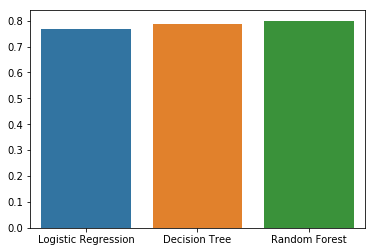

In [69]:
sns.barplot(classifier, accuracy)

**Great Job** \
You've completed your first machine learning project